In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT
# Date: March 2024

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # Taking only the first two features
y = iris.target
class_labels = iris.target_names

# Filtering for setosa and versicolor flowers
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

In [3]:
def plot_data(X, y):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], style=iris.target_names[y], 
                    palette=['r','b'], markers=('s','o'), edgecolor='k')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.legend()   

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [6]:
train_accuracy = clf.score(X_train, y_train)
print(f'Train accuracy: {train_accuracy * 100:.3f}%')

test_accuracy = clf.score(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.3f}%')

Train accuracy: 100.000%
Test accuracy: 100.000%


In [7]:
print(clf.n_iter_)

[20]


In [8]:
def plot_decision_boundary(X, y, w_opt):
    """Plot the decision boundary between the classes."""
    plot_data(X, y)  # Utilize the previously defined function to plot data points
    
    # Determine the x-axis range of the current plot and compute the corresponding y values
    line_x = np.array(plt.gca().get_xlim())
    line_y = -1 / w_opt[2] * (w_opt[1] * line_x + w_opt[0])
    
    # Plot the decision boundary as a dashed line
    plt.plot(line_x, line_y, c='k', ls='--')

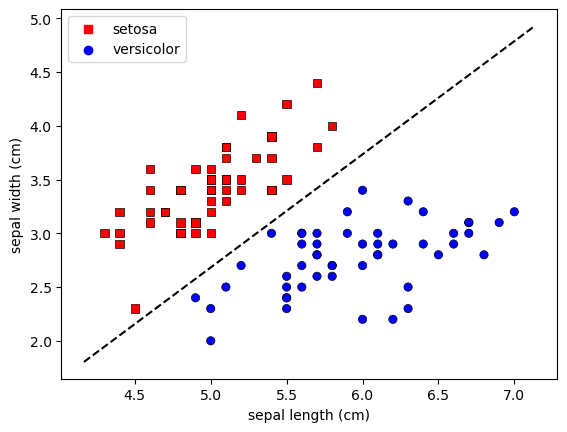

In [9]:
w_opt = np.insert(clf.coef_, 0, [clf.intercept_])
plot_decision_boundary(X, y, w_opt)
plt.savefig('figures/iris_logistic_decision_boundary2.pdf')